# GHG EMISSION IN THE UK

### Forcasting for the next 5 years

In [1]:
#To run the program, you may need to install some dependencies

#!pip install pystan fbprophet


In [2]:
import warnings;
warnings.simplefilter('ignore')

### Importing the libraries 

In [3]:
import pandas as pd
from fbprophet import Prophet

Importing plotly failed. Interactive plots will not work.


### Reading the data into pandas dataframe

In [4]:
data = pd.read_excel('ghcemission.xlsx','Total GHG')

In [5]:
data.head(50)

,"Total greenhouse gas1 emissions by industry section and group, 1990 to 2019 and (provisional) 2020",Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32,Back to contents
0,UK resident basis,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Mass of air emissions per annum in thousand to...
2,NaN,NaN,NaN,1990,1991.0,1992.0,1993.0,1994.0,1995.0,1996.0,...,2011.0,2012.0,2013.0,2014.0,2015.0,2016.0,2017.0,2018.0,2019.0,2020
3,A,NaN,"Agriculture, forestry and fishing",54667.9,54356.7,53949.2,53149.4,54274.5,54179.8,55061.4,...,46473.7,46329.2,45966.7,48025.5,48002.3,48165.6,48767.4,48200.5,48585.6,46790
4,B,NaN,Mining and quarrying,46561.7,47082.0,47618.5,47244.1,42960.3,44199.1,45485.6,...,24307.8,22873.8,21461.9,21464.0,22738.1,21603.0,21955.5,21801.2,21785.5,18796.7
5,C,NaN,Manufacturing,180059.7,181189.9,174062.0,168507.4,170908.6,168563.4,170097.7,...,93253.2,89743.9,92287.6,91811.1,88940.0,84541.4,85654.3,84381.3,83654.7,76651.1
6,D,NaN,"Electricity, gas, steam and air conditioning s...",217166.6,213890.9,201849.5,184355.7,180890.8,178960.5,178659.8,...,162382.6,176815.3,167750.5,146464.3,130386.0,108832.0,98661.6,94407.5,88395.1,80369.6
7,E,NaN,"Water supply; sewerage, waste management and r...",67600.2,69114.7,69347.9,69583.6,69818.8,70688.7,71224.8,...,30374.3,29224.8,26770.2,25121.2,25071.0,25013.9,25984.0,26294.8,26210.8,25354.2
8,F,NaN,Construction,9499,9476.0,9590.9,9737.5,10194.3,10333.2,10638.6,...,11759.1,12378.6,11607.7,12060.5,13075.2,13549.2,14051.8,14239.4,13827.1,12941
9,G,NaN,Wholesale and retail trade; repair of motor ve...,11683,12069.7,11890.2,12145.5,12536.3,12727.6,13050.2,...,16897.4,17223.8,16953.8,16816.8,17012.6,17305.2,16918.8,16522.5,16056.0,15052.3


### Promoting the 3rd row of the data as the table header

In [6]:
data.columns = data.iloc[2]

In [7]:
data.head(50)

2,NaN,NaN,NaN,1990.0,1991.0,1992.0,1993.0,1994.0,1995.0,1996.0,...,2011.0,2012.0,2013.0,2014.0,2015.0,2016.0,2017.0,2018.0,2019.0,2020.0
0,UK resident basis,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Mass of air emissions per annum in thousand to...
2,NaN,NaN,NaN,1990,1991.0,1992.0,1993.0,1994.0,1995.0,1996.0,...,2011.0,2012.0,2013.0,2014.0,2015.0,2016.0,2017.0,2018.0,2019.0,2020
3,A,NaN,"Agriculture, forestry and fishing",54667.9,54356.7,53949.2,53149.4,54274.5,54179.8,55061.4,...,46473.7,46329.2,45966.7,48025.5,48002.3,48165.6,48767.4,48200.5,48585.6,46790
4,B,NaN,Mining and quarrying,46561.7,47082.0,47618.5,47244.1,42960.3,44199.1,45485.6,...,24307.8,22873.8,21461.9,21464.0,22738.1,21603.0,21955.5,21801.2,21785.5,18796.7
5,C,NaN,Manufacturing,180059.7,181189.9,174062.0,168507.4,170908.6,168563.4,170097.7,...,93253.2,89743.9,92287.6,91811.1,88940.0,84541.4,85654.3,84381.3,83654.7,76651.1
6,D,NaN,"Electricity, gas, steam and air conditioning s...",217166.6,213890.9,201849.5,184355.7,180890.8,178960.5,178659.8,...,162382.6,176815.3,167750.5,146464.3,130386.0,108832.0,98661.6,94407.5,88395.1,80369.6
7,E,NaN,"Water supply; sewerage, waste management and r...",67600.2,69114.7,69347.9,69583.6,69818.8,70688.7,71224.8,...,30374.3,29224.8,26770.2,25121.2,25071.0,25013.9,25984.0,26294.8,26210.8,25354.2
8,F,NaN,Construction,9499,9476.0,9590.9,9737.5,10194.3,10333.2,10638.6,...,11759.1,12378.6,11607.7,12060.5,13075.2,13549.2,14051.8,14239.4,13827.1,12941
9,G,NaN,Wholesale and retail trade; repair of motor ve...,11683,12069.7,11890.2,12145.5,12536.3,12727.6,13050.2,...,16897.4,17223.8,16953.8,16816.8,17012.6,17305.2,16918.8,16522.5,16056.0,15052.3


### Removing the first 3 rows from the table with null value

In [8]:
data = data.drop([0,1,2])

### Selecting the first 25 rows of the data which contained information about GHG emission by various sectors in the UK

In [9]:
data = data.iloc[:25]

In [10]:
#obtaining the column value
data.columns.values

array([  nan,   nan,   nan, 1990., 1991., 1992., 1993., 1994., 1995.,
       1996., 1997., 1998., 1999., 2000., 2001., 2002., 2003., 2004.,
       2005., 2006., 2007., 2008., 2009., 2010., 2011., 2012., 2013.,
       2014., 2015., 2016., 2017., 2018., 2019., 2020.])

### Renaming the columns, checking for null value, and removing null value

In [11]:
#renaming the column names 
data.columns = [  'a',   'b',   'Sectors', 1990., 1991., 1992., 1993., 1994., 1995.,
       1996., 1997., 1998., 1999., 2000., 2001., 2002., 2003., 2004.,
       2005., 2006., 2007., 2008., 2009., 2010., 2011., 2012., 2013.,
       2014., 2015., 2016., 2017., 2018., 2019., 2020.]

In [12]:
data.drop(['a','b'], axis=1, inplace=True)

In [13]:
data.isnull().any()

Sectors    True
1990.0     True
1991.0     True
1992.0     True
1993.0     True
1994.0     True
1995.0     True
1996.0     True
1997.0     True
1998.0     True
1999.0     True
2000.0     True
2001.0     True
2002.0     True
2003.0     True
2004.0     True
2005.0     True
2006.0     True
2007.0     True
2008.0     True
2009.0     True
2010.0     True
2011.0     True
2012.0     True
2013.0     True
2014.0     True
2015.0     True
2016.0     True
2017.0     True
2018.0     True
2019.0     True
2020.0     True
dtype: bool

In [14]:
data.dropna()

,Sectors,1990.0,1991.0,1992.0,1993.0,1994.0,1995.0,1996.0,1997.0,1998.0,...,2011.0,2012.0,2013.0,2014.0,2015.0,2016.0,2017.0,2018.0,2019.0,2020.0
3,"Agriculture, forestry and fishing",54667.9,54356.7,53949.2,53149.4,54274.5,54179.8,55061.4,54155.4,54107.6,...,46473.7,46329.2,45966.7,48025.5,48002.3,48165.6,48767.4,48200.5,48585.6,46790
4,Mining and quarrying,46561.7,47082.0,47618.5,47244.1,42960.3,44199.1,45485.6,44823.7,43633.0,...,24307.8,22873.8,21461.9,21464.0,22738.1,21603.0,21955.5,21801.2,21785.5,18796.7
5,Manufacturing,180059.7,181189.9,174062.0,168507.4,170908.6,168563.4,170097.7,169742.9,159886.5,...,93253.2,89743.9,92287.6,91811.1,88940.0,84541.4,85654.3,84381.3,83654.7,76651.1
6,"Electricity, gas, steam and air conditioning s...",217166.6,213890.9,201849.5,184355.7,180890.8,178960.5,178659.8,163535.1,168957.6,...,162382.6,176815.3,167750.5,146464.3,130386.0,108832.0,98661.6,94407.5,88395.1,80369.6
7,"Water supply; sewerage, waste management and r...",67600.2,69114.7,69347.9,69583.6,69818.8,70688.7,71224.8,70118.4,71276.3,...,30374.3,29224.8,26770.2,25121.2,25071.0,25013.9,25984.0,26294.8,26210.8,25354.2
8,Construction,9499,9476.0,9590.9,9737.5,10194.3,10333.2,10638.6,10924.0,11200.7,...,11759.1,12378.6,11607.7,12060.5,13075.2,13549.2,14051.8,14239.4,13827.1,12941
9,Wholesale and retail trade; repair of motor ve...,11683,12069.7,11890.2,12145.5,12536.3,12727.6,13050.2,12955.8,13365.6,...,16897.4,17223.8,16953.8,16816.8,17012.6,17305.2,16918.8,16522.5,16056.0,15052.3
10,Transport and storage,65461.7,65977.1,67046.8,68347.1,69241.2,72017.9,77623.2,78864.4,82104.7,...,86620.3,81128.6,78381.8,81760.9,83824.2,84607.2,80967.2,87112.0,79546.2,47540.0
11,Accommodation and food services,2776.2,3229.6,3027.2,3219.0,3206.1,3328.8,3544.1,3181.3,3406.1,...,3190.8,3581.4,3668.1,3262.9,3503.0,3609.2,3581.4,3626.6,3595.7,3499.4
12,Information and communication,1081.7,1162.6,1142.2,1191.2,1233.7,1275.3,1288.4,1229.8,1255.9,...,960.3,978.6,938.1,892.6,906.2,926.7,887.8,856.3,844.3,781.1


### slicing to get the Total GHG emissions row from the dataset

In [15]:
total_GHG = data.iloc[24:25]

### unpivoted the columns  and renamed the columns

In [16]:
GHG_stack = pd.DataFrame(total_GHG.stack()).reset_index()

In [17]:
GHG_stack.head()

,level_0,level_1,0
0,27,Sectors,Total greenhouse gas emissions
1,27,1990.0,830696.6
2,27,1991.0,840936.5
3,27,1992.0,821212.8
4,27,1993.0,803452.2


In [18]:
GHG_stack.columns = ['A','ds', 'y']

### removing the first row and the column created

In [19]:
GHG_Total = GHG_stack.drop([0])

In [20]:
GHG_Total = GHG_Total.drop(['A'], axis=1)

### changing the datatype for modelling 

In [21]:
GHG_Total = GHG_Total.astype({'ds':int, 'y':float})
GHG_Total = GHG_Total.astype({'ds':str, 'y':float})

In [22]:
#year and value column for modelling 
GHG_Total.head()

,ds,y
1,1990,830696.6
2,1991,840936.5
3,1992,821212.8
4,1993,803452.2
5,1994,795337.4


## Train and fit Model

In [23]:
#creating the model

m = Prophet(interval_width=0.95)

model = m.fit(GHG_Total)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 23.


### making forecast for the next five years

In [24]:
future = model.make_future_dataframe(periods=6, freq='Y')
forecast = model.predict(future)
forecast.tail(10)

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
27,2017-01-01,-290141.760522,534184.485811,590415.274859,-290141.760522,-290141.760522,853493.058175,853493.058175,853493.058175,853493.058175,853493.058175,853493.058175,0.0,0.0,0.0,563351.297653
28,2018-01-01,-306199.988965,524179.905187,576485.313313,-306199.988965,-306199.988965,855635.335784,855635.335784,855635.335784,855635.335784,855635.335784,855635.335784,0.0,0.0,0.0,549435.346819
29,2019-01-01,-322258.217409,507385.129791,561364.069658,-322258.217409,-322258.217409,856243.394157,856243.394157,856243.394157,856243.394157,856243.394157,856243.394157,0.0,0.0,0.0,533985.176748
30,2020-01-01,-338316.445853,488999.244652,545271.687939,-338316.445853,-338316.445853,855317.919817,855317.919817,855317.919817,855317.919817,855317.919817,855317.919817,0.0,0.0,0.0,517001.473964
31,2020-12-31,-354374.674297,471063.619045,525218.128354,-355216.848890,-353714.056114,852861.971255,852861.971255,852861.971255,852861.971255,852861.971255,852861.971255,0.0,0.0,0.0,498487.296957
32,2021-12-31,-370432.902741,451122.515455,505588.266610,-372746.938106,-368473.538479,848880.972998,848880.972998,848880.972998,848880.972998,848880.972998,848880.972998,0.0,0.0,0.0,478448.070257
33,2022-12-31,-386491.131185,431402.051394,485018.995181,-390575.358359,-382882.281459,843382.705863,843382.705863,843382.705863,843382.705863,843382.705863,843382.705863,0.0,0.0,0.0,456891.574678
34,2023-12-31,-402549.359629,405607.486798,462879.088642,-408710.381855,-396618.578310,836377.293416,836377.293416,836377.293416,836377.293416,836377.293416,836377.293416,0.0,0.0,0.0,433827.933787
35,2024-12-31,-418651.583219,405196.892312,461969.682861,-426796.617225,-410064.771768,852861.971255,852861.971255,852861.971255,852861.971255,852861.971255,852861.971255,0.0,0.0,0.0,434210.388036
36,2025-12-31,-434709.811663,382569.709197,441723.739452,-445744.251665,-423597.118721,848880.972998,848880.972998,848880.972998,848880.972998,848880.972998,848880.972998,0.0,0.0,0.0,414171.161335


## Visualising the Annual GHG emission and a forecast for the next 5 years

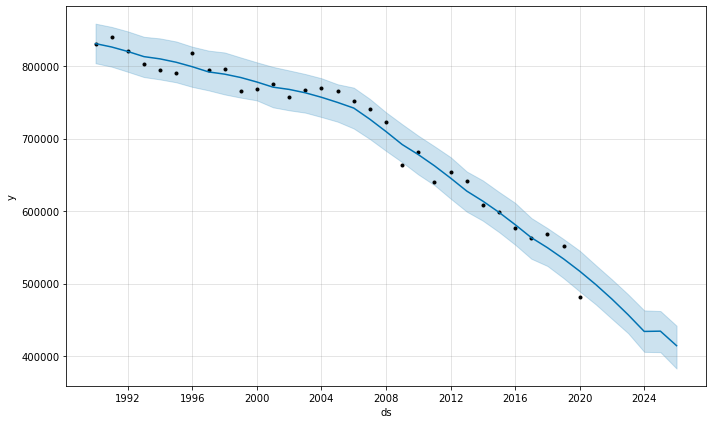

In [25]:
plot1= model.plot(forecast)

### Visualising the trend and seasonality 

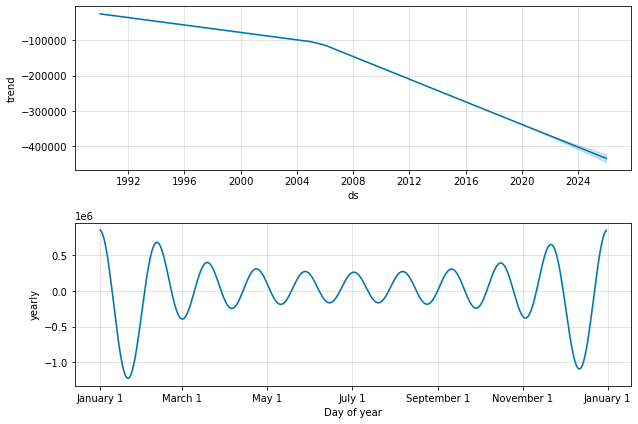

In [26]:
plot2 = m.plot_components(forecast)

# Summary

### Dataset

The GHG emissions in the Uk dataset from ONS atmospheric emissions was selected. The dataset contained several sheets of the different GHG emissions in the UK over the period of 1990 - 2020.
However, for this model we used the first sheet from the dataset which contained the total GHG emissions from all sectors from 1990 - 2020. 

The data was loaded using the Pandas library, and was preprocessed and cleaned using this library. 

### Preprocessing and Cleaning

The dataset was loaded into a pandas dataframe. The row in the table containing the years in the dataset was promoted and made the header of the table, the rows containing null value was dropped, as well as the columns containing null values. 

The columns were renamed and missing values were checked and removed from the table, and the data was sliced by its index containing the roles I was interested in. Howeve, I was working with the row containing the Total GHG emmissions value, which was sliced out of the table. 

The new table containg the total GHG emissions was unpivoted and re-indexed, the columns were renamed and the data type for the columns were changed to suit the modelling of the data. 

The columns were renamed into 'ds' for the year column and 'y' for the GHG emissions value column.


### Training Model and Forecasting

The fbprophet library was utilised for this time series analysis in forecasting GHG emissions in the UK for the next 5years.  
The model was instantiated with a 95% confidence interval. The model was trained with the preprocessed data and used to make prediction for a period of 5 years. 

### Result

The figure above has shown a great decrease in the total GHG emissions in the UK from 1990 - 2020. 

The forecast for the next 5 years has shown that the GHG emissions would continue to decrease significantly over the next five years as seen in the trend of the projection. 

### Implication to UK Government


Given the targeted net zero GHG emissions by 2050, this forecast has shown a 50% reduction of GHG emissions from 1990 to 2025,  with the aim targetting 80% reduction in GHG emissions compared with the levels of 1990, adequate measures needs to be taken to achieve this goal. Further research needs to carried out to check which particular industries is increasingly contributing to this GHG emissions and look at measure to futher remove and reduce the GHG emissions. 

### Suggestion for Model Improvement

 - The model could be trained on dataset with nonthly GHG emissions valuesv instead of yearly GHG emissions to better improve the prediction of the model and the model ability to predict GHG emissions for future times by showing monthly and quarterly trends.
 
 - Possibility of tuning the models hyper parameters such as the growth, changepoint or seasonalities.